For detailed information about the dataset and its respective preparation and/or Principal Component Analysis please look at 'Titanic(age_by_mean)_PCA_LogisticRegression'. In this file I will skip each step explained in that file and will talk about only the things not covered in it.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('Data/titanic_train.csv')

In [2]:
df = df.drop(['Name','Ticket','Cabin'], axis=1)

In [3]:
df.loc[:,"Age"].median()


28.0

In [4]:
df["Age"].fillna(28, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [7]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
X=df.drop('Survived',axis=1)
X_renamed = X.rename(columns={'SibSp': 'Num Siblings/Spoused','Parch':'Num Parents/Children'})
y=df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_renamed, y, test_size=0.3,random_state=2)

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca=PCA(n_components=None)
X_trainPCAFull = pca.fit_transform(X_train)
X_testPCAFull = pca.transform(X_test)
pca.explained_variance_ratio_

array([0.20955595, 0.1828847 , 0.17302231, 0.11209409, 0.09699353,
       0.08372295, 0.0607394 , 0.04367921, 0.03730786])

In [10]:
sum(pca.explained_variance_ratio_[0:4])

0.6775570437840345

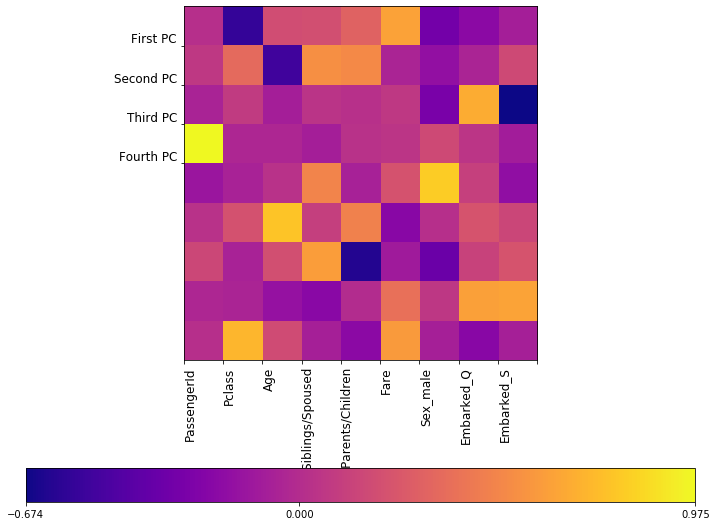

In [11]:
import numpy as np
fig = plt.figure(figsize=(12, 10))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(X_renamed.iloc[:, 0:9].columns)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5,4));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC','Second PC','Third PC', 'Fourth PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.2);

In [12]:
pca.components_

array([[ 0.01638889, -0.55601575,  0.18703961,  0.20077124,  0.30644595,
         0.62107802, -0.30065604, -0.19915541, -0.07470619],
       [ 0.0721532 ,  0.344134  , -0.5095361 ,  0.54238907,  0.51115745,
        -0.04431458, -0.16833173, -0.04767694,  0.16940596],
       [-0.05028446,  0.08086735, -0.08002142,  0.04146872,  0.02827346,
         0.06827405, -0.27939285,  0.66759305, -0.67350373],
       [ 0.97503548, -0.03332703, -0.03085558, -0.08045312,  0.03172302,
         0.04946587,  0.16383364,  0.05200819, -0.08815225],
       [-0.12711382, -0.0610204 ,  0.03470707,  0.48379954, -0.0675762 ,
         0.22134091,  0.80519139,  0.11550173, -0.17210417],
       [ 0.03407779,  0.2092159 ,  0.77533684,  0.10821539,  0.47238054,
        -0.21514576,  0.02117767,  0.22418178,  0.14856847],
       [ 0.15084426, -0.05675279,  0.19747961,  0.60332406, -0.61204531,
        -0.10584034, -0.3434223 ,  0.12612655,  0.22666847],
       [-0.02978891, -0.04305417, -0.15518915, -0.20707716,  0

In [13]:
pca = PCA(n_components = 4)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

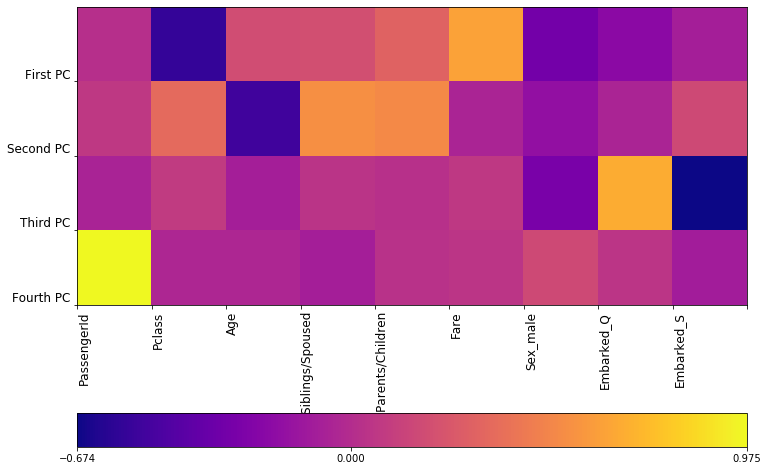

In [14]:
import numpy as np
fig = plt.figure(figsize=(12, 10))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(X_renamed.iloc[:, 0:9].columns)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5,4));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='left', fontsize=12);
plt.gca().set_yticklabels(['First PC','Second PC','Third PC', 'Fourth PC'], va='bottom', fontsize=12);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.2);

I will import the random forest classifier library and try to find out which hyperparameters suit our dataset best.

In [15]:
from sklearn import ensemble

Score = []
for i in range(5,200,5):
    RFC = ensemble.RandomForestClassifier ( n_estimators=i, random_state=2 )
    RFC.fit(X_trainPCA, y_train)
    prediction_RFC = RFC.predict(X_testPCA)
    Score.append(round(RFC.score(X_trainPCA, y_train) * 100, 2))


Score

[96.3,
 97.43,
 99.04,
 99.52,
 99.36,
 99.52,
 99.36,
 99.52,
 99.84,
 99.84,
 99.84,
 99.84,
 99.84,
 99.84,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0]

In [16]:
print('The maximum score is:',max(Score),'.')
index = Score.index(max(Score))
estimators = index*5
print('The number of estimators to be used is: ',estimators,'.')

The maximum score is: 100.0 .
The number of estimators to be used is:  70 .


In [17]:
from sklearn.metrics import classification_report, confusion_matrix

RFC = ensemble.RandomForestClassifier ( n_estimators=estimators,random_state=2 )
RFC.fit(X_trainPCA, y_train)
prediction_RFC = RFC.predict(X_testPCA)


print('Variance score: %.4f' % r2_score(y_test, prediction_RFC))


Variance score: 0.0771


              precision    recall  f1-score   support

           0       0.79      0.91      0.84       170
           1       0.78      0.58      0.66        97

    accuracy                           0.79       267
   macro avg       0.78      0.74      0.75       267
weighted avg       0.79      0.79      0.78       267



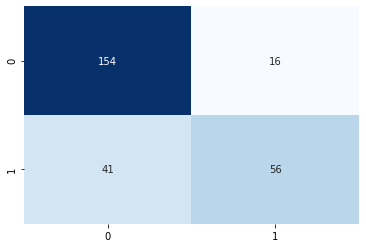

In [18]:
cfm = confusion_matrix(y_test,prediction_RFC)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')
print(classification_report(y_test, prediction_RFC))

In [19]:
Score = round(RFC.score(X_trainPCA, y_train) * 100, 2)
Score

99.84